In [3]:
#Import necessary packages

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pymongo import MongoClient

#Open MongoDB connection
client = MongoClient()

#Create database/start connection to database
db = client.news
articles = db.news

#Import created pipeline class
from nlp_pipeline import nlp_pipeline

In [4]:
#Query database
cursor = db.articles.find({}, {'_id':0, 'title': 1, 'is_opinion': 1, 'author': 1, 'link': 1, 'published_date': 1, 'summary': 1, 'published_date': 1})

#Create dictionary
article_headers = ['title', 'is_opinion', 'author', 'link', 'published_date', 'summary', 'published_date']

news_data = []

news_dict = dict(zip(articles_headers, ['title', 'is_opinion', 'author', 'link', 'published_date', 'summary', 'published_date']))

for article in cursor:
    full_news_docs.append(title['title'])

    'is_opinion'
    'author'
    'link'
    'published_date'
    'summary'
    'published_date'

In [5]:
list(db.articles.find({}))[0]

{'_id': '73e446e2cc751f30d0b60e566b14d490',
 'title': "MeToo gave women the power to say 'no'",
 'author': 'Michael Medved',
 'published_date': '2021-07-13 12:36:54',
 'published_date_precision': 'full',
 'link': 'https://www.newsweek.com/metoo-movement-gave-women-power-say-no-opinion-1608974',
 'clean_url': 'newsweek.com',
 'summary': "The following is a lightly edited transcript of remarks made by Jill Filipovic during a Newsweek podcast debate on the legacy of the #MeToo movement. You can listen to the podcast here:\nI think #MeToo has changed us for the better. That doesn't mean that it has changed us universally for the better, and that there are no downsides. But it does mean that we are doing an increasingly good if imperfect job at separating out what historically we have thought of as sex, flirting, and normal sexual be",
 'rights': 'newsweek.com',
 'rank': 392,
 'topic': 'news',
 'country': 'US',
 'language': 'en',
 'authors': ['Michael Medved'],
 'media': 'https://d.newsweek

In [5]:
#Pickle objects for easier future import

pickle.dump(full_news_docs, open('full_news_docs','wb')) #All docs for processing

In [10]:
#Load in pickled objects

full_news_docs = pickle.load(open('full_news_docs','rb'))

# Exploratory Data Analysis

In [6]:
#Average article title length

total_len = 0
for title in full_news_docs:
    title_len = len(title)
    total_len += title_len
    average_len = total_len/len(full_news_docs)
print('Average title length: ', average_len, 'characters')

Average title length:  68.04440978492859 characters


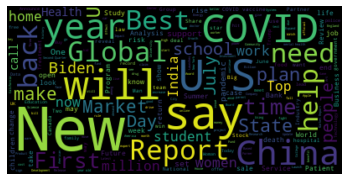

In [7]:
#Add wordcloud here for whole corpus
full_news_docs_wordcloud = ' '.join(full_news_docs) #Create corpus

# Display the generated image
wordcloud = WordCloud(stopwords = STOPWORDS).generate(full_news_docs_wordcloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Try Previous NMF Model with New Data Input

In [9]:
nlp_model_10 = nlp_pipeline(vectorizer=TfidfVectorizer(stop_words='english', max_df=.9, min_df = 10), tokenizer=None, cleaning_function=None, stemmer=None, lemm=WordNetLemmatizer(), model=NMF(n_components=12, random_state=42, max_iter=2000))

nlp_model_10.fit_transform(full_news_docs)
nlp_model_10.print_topics(10)

/Users/ANGar/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic #0: market global billion reach report insight cagr forecast usd million
Topic #1: new york launch deal case city study state zealand announce
Topic #2: covid vaccine case pandemic death study patient vaccination test risk
Topic #3: say biden china police right security president social court trump
Topic #4: conversation news research analysis page information et analyse recherche france
Topic #5: health care mental public worker woman service family insurance plan
Topic #6: school student high public college state law education help teacher
Topic #7: announces second quarter earnings release conference result corporation report financial
Topic #8: price stock year home rise june sale consumer buy rate
Topic #9: tax child credit payment family million need card expanded work
Topic #10: best work place summer business booty shaking luke bryan shot
Topic #11: july world day history today rate news week cup national


In [10]:
#Pickle final model

pickle.dump(nlp_model_10, open('topic_model','wb')) 